In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams

In [2]:
data=pd.read_csv("/content/AirPassengers.csv")

In [3]:
data.head()


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
data['Month']=pd.to_datetime(data['Month'],infer_datetime_format=True)

<ipython-input-4-9b71f5305629>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Month']=pd.to_datetime(data['Month'],infer_datetime_format=True)


In [5]:
IndexData=data.set_index(['Month'])

In [6]:
from datetime import datetime
IndexData.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


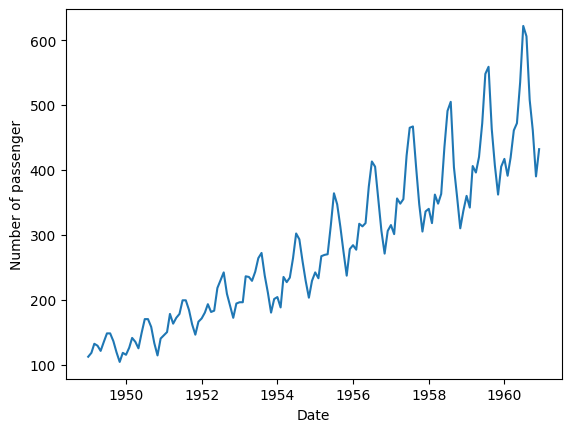

In [7]:
plt.xlabel('Date')
plt.ylabel('Number of passenger')
plt.plot(IndexData)

In [8]:
rolmean=IndexData.rolling(window=12).mean()
rolstd=IndexData.rolling(window=12).std()
print(rolmean, rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


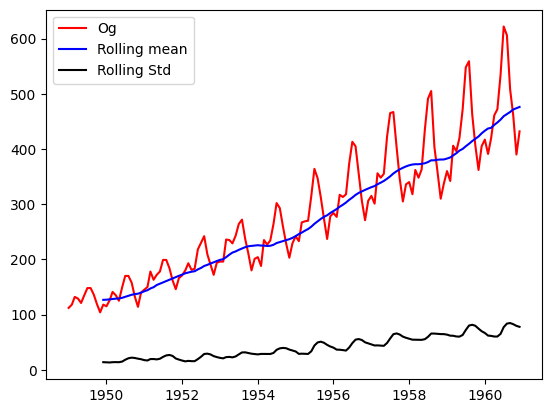

In [9]:
orginal=plt.plot(IndexData, color='red', label ='Og')
mean=plt.plot(rolmean, color='blue', label="Rolling mean")
std=plt.plot(rolstd, color='black', label="Rolling Std")
plt.legend(loc='best')
plt.show()


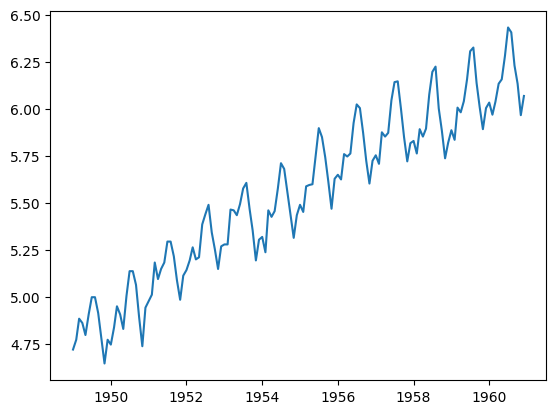

In [10]:
IndexData_logScale=np.log(IndexData)
plt.plot(IndexData_logScale)

In [11]:
Movingavg= IndexData_logScale.rolling(window=12).mean()
movingstd= IndexData_logScale.rolling(window=12).mean()

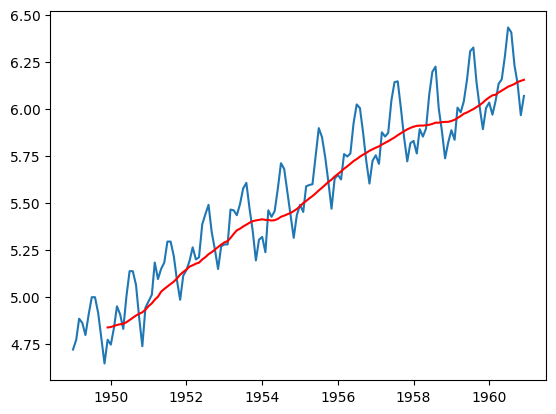

In [12]:
plt.plot(IndexData_logScale)
plt.plot(Movingavg, color='red')

In [13]:
dataset_Log_minus_moving_avg= IndexData_logScale-Movingavg
dataset_Log_minus_moving_avg.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [14]:
dataset_Log_minus_moving_avg.dropna(inplace=True)
dataset_Log_minus_moving_avg.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


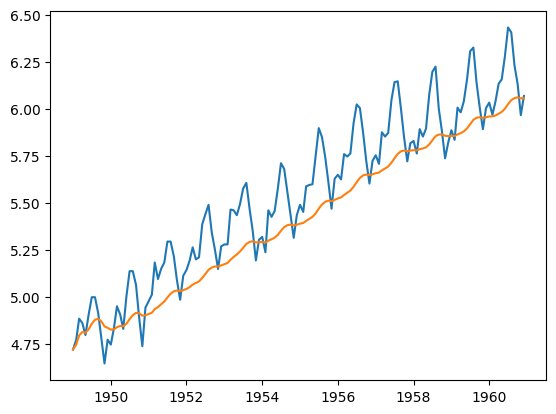

In [ ]:
exponential_decay_weighted_avg=IndexData_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
 plt.plot(IndexData_logScale)
 plt.plot(exponential_decay_weighted_avg)